# **GWU - DATATHON**
**ABSTRACT**

The crash data provided by Metropolitan Police Department had 596381 observations with 14 features. The columns Object Id, CCn and Vehicle Id looks like they don't have much influence on the target "fatal", so they were removed. In the dataset, the attribute 'age' had missing values. Hence, the missing values were filled with median of the column. The Exploratory Data Analysis, showed that the target have only minor relations with other variables but with 'speeding', it had strong positive correlation than others.It shows that whenever there is an recording of speeding as True, the chance of fatality is also more. The dataset was imbalanced, hence resampling technique was used to balance the minority problem.The random forest model developed had an accuracy of 99.9% in predicting the target variable.Then selected only 6 most important features using selectKBest and f_classif. Here the model complexity is reduced a lot with very little decrease in accuracy
Cross Validation gave nearly 99.8% of accurate results. Most of the times the default values for hyper parameters of the models are same that we get through the hyper parameter tunning. That's the reason the models parameters weren't tuned, since there will not be much difference in normal model and tunned model.





Notebook submitted by Rehapriadarsini Manikandasamy (First semester, M.S. in Datascience student)

# **About the Dataset:**

These crash data are derived from the Metropolitan Police Department's (MPD) crash data management system (COBALT) and represent DDOT's attempt to summarize some of the most requested elements of the crash data.  Further, DDOT has attempted to enhance this summary by locating each crash location along the DDOT center line, providing a number of location references for each crash.  In the event that location data is missing or incomplete for a crash, it is unable to be published within this dataset.


Crash details related table,
Type of participant (driver, occupant, bicyclist, pedestrian)
Age of participants
If injured, severity (minor, major, fatal)
Type of vehicle (passenger car, large truck, taxi, government, bicycle, pedestrian, etc)
If persons issued a ticket
If a vehicle, the state (jurisdiction) license plate was issued (not license plate number)
Are any persons deemed ‘impaired’
Was person in vehicle where speeding was indicated

Data source: https://opendata.dc.gov/datasets/70248b73c20f46b0a5ee895fc91d6222


# **Project**

# **Data Preprocessing:**

**Load dataset:**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Crash_Details_Table.csv to Crash_Details_Table.csv


let's load the dataset and see first few rows of the dataset to understand the basic structure of data.

In [2]:
import io
import pandas as pd
dataset = pd.read_csv(io.BytesIO(uploaded['Crash_Details_Table.csv']))
dataset.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,CRIMEID,CCN,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,VEHICLEID,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,438194351,26872544,16034312,84628234,Passenger,31.0,N,N,N,2275009,Passenger Car/automobile,N,VA,Y,N
1,438194352,26872544,16034312,84833902,Passenger,31.0,N,N,N,2275009,Passenger Car/automobile,N,VA,Y,N
2,438194353,26872544,16034312,84938064,Driver,NaN,N,N,N,2275007,Passenger Car/automobile,N,None,N,N
3,438194354,26872544,16034312,84790164,Driver,31.0,N,N,N,2275009,Passenger Car/automobile,N,VA,N,N
4,438194355,26872544,16034312,84953497,Passenger,47.0,N,N,Y,2275008,Passenger Car/automobile,N,VA,Y,N
5,438194356,26872544,16034312,85038077,Driver,63.0,N,N,N,2275008,Passenger Car/automobile,N,VA,N,N
6,438194357,27308896,17080828,85710507,Driver,42.0,N,N,N,3150162,Passenger Car/automobile,N,VA,Y,N
7,438194358,26872547,16034343,84602464,Passenger,23.0,N,N,N,2275002,Passenger Car/automobile,N,NY,N,N
8,438194359,26872547,16034343,84740727,Driver,25.0,N,N,N,2275002,Passenger Car/automobile,N,NY,N,N
9,438194360,26872547,16034343,84924532,Driver,28.0,N,N,N,2275003,Passenger Car/automobile,N,VA,N,N


Try to get little bit more information about the dataset:

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596381 entries, 0 to 596380
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           596381 non-null  int64  
 1   CRIMEID            596381 non-null  int64  
 2   CCN                596381 non-null  object 
 3   PERSONID           596381 non-null  int64  
 4   PERSONTYPE         596381 non-null  object 
 5   AGE                426744 non-null  float64
 6   FATAL              596381 non-null  object 
 7   MAJORINJURY        596381 non-null  object 
 8   MINORINJURY        596381 non-null  object 
 9   VEHICLEID          596381 non-null  object 
 10  INVEHICLETYPE      596381 non-null  object 
 11  TICKETISSUED       596381 non-null  object 
 12  LICENSEPLATESTATE  596381 non-null  object 
 13  IMPAIRED           596381 non-null  object 
 14  SPEEDING           596381 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 6

The DataFrame contains 596381 entries in total, with 14 features. Of those 14 features, 13 have non-null values for every entry, and 1 doesn't: 'Age', which has only 426744 non-null entries (means missing values).

**Dropping columns which are not useful:**

In [4]:
cols=['OBJECTID','CCN','VEHICLEID']
dataclean = dataset.drop(cols, axis=1)

In [5]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596381 entries, 0 to 596380
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CRIMEID            596381 non-null  int64  
 1   PERSONID           596381 non-null  int64  
 2   PERSONTYPE         596381 non-null  object 
 3   AGE                426744 non-null  float64
 4   FATAL              596381 non-null  object 
 5   MAJORINJURY        596381 non-null  object 
 6   MINORINJURY        596381 non-null  object 
 7   INVEHICLETYPE      596381 non-null  object 
 8   TICKETISSUED       596381 non-null  object 
 9   LICENSEPLATESTATE  596381 non-null  object 
 10  IMPAIRED           596381 non-null  object 
 11  SPEEDING           596381 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 54.6+ MB


**Handling missing values:**
Age has lots of missing values. Lets compute a median or interpolate() all the ages and fill those missing age values. 

In [6]:
dataclean['AGE'] = dataclean['AGE'].interpolate()

In [7]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596381 entries, 0 to 596380
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CRIMEID            596381 non-null  int64  
 1   PERSONID           596381 non-null  int64  
 2   PERSONTYPE         596381 non-null  object 
 3   AGE                596381 non-null  float64
 4   FATAL              596381 non-null  object 
 5   MAJORINJURY        596381 non-null  object 
 6   MINORINJURY        596381 non-null  object 
 7   INVEHICLETYPE      596381 non-null  object 
 8   TICKETISSUED       596381 non-null  object 
 9   LICENSEPLATESTATE  596381 non-null  object 
 10  IMPAIRED           596381 non-null  object 
 11  SPEEDING           596381 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 54.6+ MB


We can see that Age has been interpolated with new imputed values. 

# **EDA:**

Let's check are there any missing values in other columns

In [8]:
dataclean.isnull().sum()

CRIMEID              0
PERSONID             0
PERSONTYPE           0
AGE                  0
FATAL                0
MAJORINJURY          0
MINORINJURY          0
INVEHICLETYPE        0
TICKETISSUED         0
LICENSEPLATESTATE    0
IMPAIRED             0
SPEEDING             0
dtype: int64

Let's try to understand the number of levels in categorical variables

In [9]:
dataclean['INVEHICLETYPE'].value_counts()

Passenger Car/automobile                      401933
Other Vehicle                                  50871
Suv (sport Utility Vehicle)                    34122
Passenger Van                                  19297
None                                           17544
Bus                                            16900
Firearms                                       14225
Pickup Truck                                   12418
Large/heavy Truck                              10231
Cargo Van                                       5015
Drugs/ Narcotics                                4054
Other Small/light Truck                         3574
Motor Cycle                                     2791
Moped/scooter                                   1371
Construction/industrial Equipment                767
Motorhome/camper/rv (recreational Vehicle)       475
Trailer                                          427
Farm Equipment                                   181
Atv (all Terrain Vehicle)                     

In [10]:
dataclean['PERSONTYPE'].value_counts()

Driver        459670
Passenger     118813
Pedestrian     13758
Bicyclist       4140
Name: PERSONTYPE, dtype: int64

In [11]:
dataclean['LICENSEPLATESTATE'].value_counts()

DC       224261
MD       174460
VA        76945
 None     67689
Un         9344
PA         4340
NC         3416
FL         3329
NY         3246
NJ         3020
US         2187
TX         1966
Ot         1741
IL         1694
GA         1651
MA         1240
AZ         1238
Di         1175
OH         1153
DE         1149
IN         1035
SC          996
MI          870
TN          855
CA          822
WV          779
CT          654
OK          527
AL          433
WA          393
ME          337
LA          304
KY          280
MO          255
WI          249
MN          201
MS          180
VT          173
RI          153
Ou          151
CO          146
NH          143
IA          132
AR          127
OR          127
WY          109
KS          100
NE           87
NV           76
UT           72
NM           71
AK           60
Vi           58
MT           51
ND           41
ID           39
SD           30
HI           19
Pu            1
Am            1
Name: LICENSEPLATESTATE, dtype: int64

Let's convert objects to numeric values using Label encoders

In [12]:
from sklearn.preprocessing import LabelEncoder
Le =LabelEncoder()
dataclean.PERSONTYPE=Le.fit_transform(dataclean.PERSONTYPE)
dataclean.FATAL=Le.fit_transform(dataclean.FATAL)
dataclean.MINORINJURY=Le.fit_transform(dataclean.MINORINJURY)
dataclean.MAJORINJURY=Le.fit_transform(dataclean.MAJORINJURY)
dataclean.INVEHICLETYPE=Le.fit_transform(dataclean.INVEHICLETYPE)
dataclean.TICKETISSUED=Le.fit_transform(dataclean.TICKETISSUED)
dataclean.LICENSEPLATESTATE=Le.fit_transform(dataclean.LICENSEPLATESTATE)
dataclean.IMPAIRED=Le.fit_transform(dataclean.IMPAIRED)
dataclean.SPEEDING=Le.fit_transform(dataclean.SPEEDING)
dataclean.head()

,CRIMEID,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,26872544,84628234,2,31.0,0,0,0,15,0,53,1,0
1,26872544,84833902,2,31.0,0,0,0,15,0,53,1,0
2,26872544,84938064,1,31.0,0,0,0,15,0,0,0,0
3,26872544,84790164,1,31.0,0,0,0,15,0,53,0,0
4,26872544,84953497,2,47.0,0,0,1,15,0,53,1,0


Let's understand the distribution of variables in the forthcoming code shells.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

Let's see how each features are related with others using corr() function.

In [14]:
dataclean.corr()

,CRIMEID,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
CRIMEID,1.000000,0.242591,-0.053551,-0.083951,-0.006129,-0.118922,0.065327,-0.022745,0.298251,0.017190,0.069261,-0.036133
PERSONID,0.242591,1.000000,-0.402586,-0.033377,-0.022917,-0.207978,-0.100862,0.072496,0.090526,0.138023,0.022064,0.003745
PERSONTYPE,-0.053551,-0.402586,1.000000,-0.062133,0.022272,0.125422,0.169517,-0.065320,-0.208258,-0.062990,-0.005469,-0.042788
AGE,-0.083951,-0.033377,-0.062133,1.000000,0.002359,0.006872,-0.011622,-0.032366,0.016512,-0.027554,-0.007861,-0.025862
FATAL,-0.006129,-0.022917,0.022272,0.002359,1.000000,-0.005100,-0.009335,-0.006566,-0.004502,-0.009209,0.001912,0.031165
MAJORINJURY,-0.118922,-0.207978,0.125422,0.006872,-0.005100,1.000000,-0.068037,-0.017446,-0.070559,-0.049207,-0.005605,0.017234
MINORINJURY,0.065327,-0.100862,0.169517,-0.011622,-0.009335,-0.068037,1.000000,0.002138,-0.017487,-0.051972,0.011959,0.004211
INVEHICLETYPE,-0.022745,0.072496,-0.065320,-0.032366,-0.006566,-0.017446,0.002138,1.000000,0.003969,0.119362,0.019970,0.016975
TICKETISSUED,0.298251,0.090526,-0.208258,0.016512,-0.004502,-0.070559,-0.017487,0.003969,1.000000,0.062479,0.080868,-0.007491
LICENSEPLATESTATE,0.017190,0.138023,-0.062990,-0.027554,-0.009209,-0.049207,-0.051972,0.119362,0.062479,1.000000,0.013731,0.003965


The above correlation matrix can be visualized using heatmaps

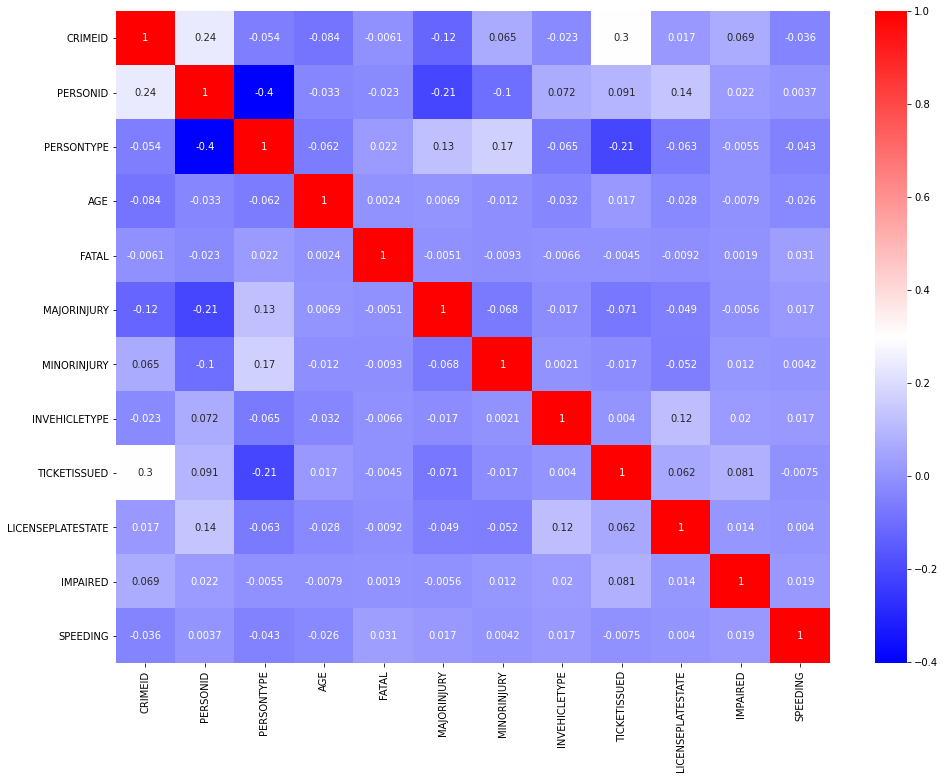

In [15]:
plt.figure(figsize=(16, 12))
sns.heatmap(dataclean.corr(), cmap='bwr', annot=True)

We can see from heatmap that the feature 'speeding' has relatively high positive correlation with Fatal (our target variable).
Let's understand the basic statistics of the data.

In [16]:
dataclean.describe()

,CRIMEID,PERSONID,PERSONTYPE,AGE,FATAL,MAJORINJURY,MINORINJURY,INVEHICLETYPE,TICKETISSUED,LICENSEPLATESTATE,IMPAIRED,SPEEDING
count,5.963810e+05,5.963810e+05,596381.000000,596381.000000,596381.000000,596381.000000,596381.000000,596381.000000,596381.000000,596381.000000,596381.000000,596381.000000
mean,2.672116e+07,8.506922e+07,1.238420,39.064716,0.000699,0.035838,0.110746,14.211504,0.155146,19.980603,0.007965,0.007651
std,1.238390e+06,8.613766e+06,0.491526,21.667780,0.026433,0.185886,0.313818,3.209115,0.362044,16.572715,0.088889,0.087136
min,2.341134e+07,1.045383e+07,0.000000,-7990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.532167e+07,8.474899e+07,1.000000,28.666667,0.000000,0.000000,0.000000,15.000000,0.000000,9.000000,0.000000,0.000000
50%,2.680585e+07,8.497752e+07,1.000000,38.000000,0.000000,0.000000,0.000000,15.000000,0.000000,12.000000,0.000000,0.000000
75%,2.769386e+07,8.712287e+07,1.000000,49.444444,0.000000,0.000000,0.000000,15.000000,0.000000,23.000000,0.000000,0.000000
max,2.872803e+07,9.077153e+07,3.000000,237.000000,1.000000,1.000000,1.000000,21.000000,1.000000,59.000000,1.000000,1.000000


# **Model building**

In [19]:
from sklearn.model_selection import train_test_split
# Splitting data into Input and Target Variable
y = dataclean[['FATAL']] # target variable 
X = dataclean.drop(['FATAL','PERSONID'], axis=1) # input variables

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,f1_score
ac=accuracy_score(y_test, predictions)
f_score = f1_score(y_test ,predictions)
print("Model Accuracy:", ac)
print('The f1 score for the model model is:',f_score)

Model Accuracy: 0.999203534629476
The f1 score for the model model is: 0.0


Here, the accuracy of the mode on test data is 0.99 which is an excellent score. However, the f1 score is zero which indicates that the model is performing poorly on the minority class. This shows imbalance in class


We can see the imbalance in the below plot

In [24]:
dataclean.FATAL.value_counts()

0    595964
1       417
Name: FATAL, dtype: int64

In [25]:
dataclean.FATAL.value_counts() / len(dataclean) * 100

0    99.930078
1     0.069922
Name: FATAL, dtype: float64

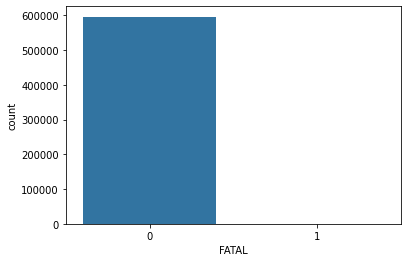

In [26]:
sns.countplot(dataclean.FATAL)

We see, of 596381 records only 417 were fatal injuries.There are only 0.06 percent of the data which are fatal and the rest 99% are not fatal. This is clearly a class imbalance problem. 


we will use class_weight parameter to overcome this class imbalance

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,f1_score
ac=accuracy_score(y_test, predictions)
f_score = f1_score(y_test ,predictions)
print("Model Accuracy:", ac)
print('The f1 score for the model is:',f_score)

Model Accuracy: 0.7901691021739312
The f1 score for the model model is: 0.0043758453337576575


By using single class_weight parameter we have improved F-score but it is not significant much and we can see our accuracy have decreased it shows our class imbalance has been solved and we got the actual accuracy of our model

We can perform hyperparameter tuning to optimise our model

**Hyperparameter tuning**:

Let's try to figure out the best parameter values for the model

In [62]:
penalty = ['l1', 'l2'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['lbfgs', 'saga','newton-cg'] 
param_grid = dict(penalty=penalty, 
C=C, 
class_weight=class_weight, 
solver=solver) 
logistic = LogisticRegression() 
grid = GridSearchCV(estimator=logistic, 
param_grid=param_grid, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 
grid_result = grid.fit(X_train, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 54.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 67.7min finished


Best Score:  0.7722423772810326
Best Params:  {'C': 100, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2', 'solver': 'newton-cg'}


The tuning gave the same set of parameters we used to handle the class imbalance. Yet, let's try to implement and see if there is any improvement

In [65]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver='newton-cg', class_weight='balanced',C=100,penalty='l2')
lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score,f1_score
ac=accuracy_score(y_test, predictions)
f_score = f1_score(y_test ,predictions)
print("Model Accuracy:", ac)
print('The f1 score for the model is:',f_score)

Model Accuracy: 0.7847196022703455
The f1 score for the model is: 0.004419975186104218


The model still doesn't improve much after tuning the model. So, will try to use some advanced algorithim like 'Random Forest'

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',class_weight='balanced')
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [79]:
rfc.score(X_test,y_test)

0.9991783830914593

**Feature Selection:** 

Let's take only the top 6 features and check for the performance. Reducing the number of variables will help to reduce computational complexities , at the same time it will improve the performance in some cases

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=6)
X_new = selector.fit_transform(X, y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.998507675411018

We can see that there is a minor reduction in accuracy. But we need to look that we got 99.9% accuracy when we used 10 features,now we selected only 6  features of 10 features and still able to get 99.8% accurate results.
The conclusion is that we have reduced a lot of computational complexities since our moto is not only to increase the performance of the model but also to reduce the computational complexity of the model.


 **Cross validation:**

 Cross validation helps in dividing te train set to train and validation set. It helps us to understand which parameters we need to tune.

In [86]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(rfc, X_new, y, cv=10, scoring=["accuracy", "precision", "recall"])
cv_results

{'fit_time': array([56.90336657, 57.437217  , 57.11249924, 57.53964353, 55.84073663,
        57.77649188, 58.29067278, 56.16724825, 57.54637241, 58.12541318]),
 'score_time': array([0.61537147, 0.6408112 , 0.62277079, 0.63965702, 0.56110168,
        0.59660411, 0.64705968, 0.61931491, 0.6104064 , 0.62883878]),
 'test_accuracy': array([0.99889334, 0.99787049, 0.99835675, 0.99880948, 0.99864181,
        0.99813877, 0.99839029, 0.99860827, 0.99867534, 0.99823938]),
 'test_precision': array([0.07142857, 0.01136364, 0.01694915, 0.        , 0.        ,
        0.        , 0.        , 0.04444444, 0.02564103, 0.01538462]),
 'test_recall': array([0.04761905, 0.02439024, 0.02439024, 0.        , 0.        ,
        0.        , 0.        , 0.04761905, 0.02380952, 0.02380952])}

In [87]:
print("Accuracy: ", cv_results["test_accuracy"].mean())

Accuracy:  0.9984623916071269


Even, the cross validation shows an accuracy of 99.8%. Most of the times the default values for hyper parameters of the models are same that we get through the hyper parameter tunning. That's the reason we are not doing hyper parameter tuning again , since there will not be much difference in normal model and tunned model.Hence, the model has very good accuracy where it predicts the feature 'fatal' when only top 6 features are feeded to it.

# **Discussion:**

According to the analysis, the attribute 'Speeding' had a positive correlation with the target 'Fatal'. This shows that exceeding the speed limit serves as major cause for crashes. Hence, policy to adapt intelligent speed assistant might help the drivers to control their speed according to the local speed limit. Setting up a speed monitor to the vehicles will help to keep track on the drivers history of speed violations, so that the police department can charge serious speed offenders. Severe charges and punishments for continuous violations in speed limit will reduce the number of crashes.

Reference:

van der Pas,J.W.G.M., Kessels,J., Veroude, B.D.G., & van Wee, B. (2014).
Intelligent speed assistance for serious speeders: The results of the Dutch speedlock trial, *Accident Analysis & Prevention*, *72*, 78-94, https://doi.org/10.1016/j.aap.2014.05.031.